In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
churn_df = pd.read_csv('/content/telecom_churn_clean.csv')

In [3]:
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

(3333, 2) (3333,)


KNeighborsClassifier(n_neighbors=15)

In [6]:
X_new = np.array([[56.8, 17.5], [24.4, 24.1], [50.1, 10.9]])
print(X_new.shape)
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

(3, 2)
Predictions: [1 0 0]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.872


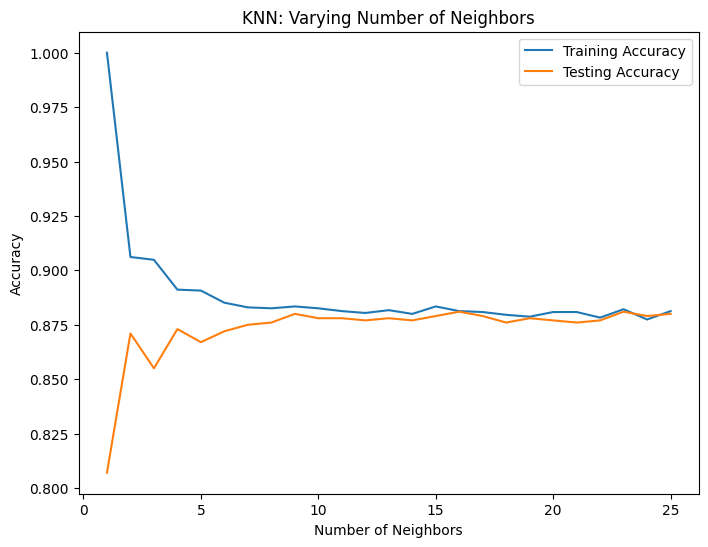

In [16]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [30]:
#мера точности для классификации
df = pd.read_csv('/content/diabetes_clean.csv')
X, y = df.drop(columns = 'diabetes'), df['diabetes']
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred)) #вложенный список
print(classification_report(y_test, y_pred))

[[163  43]
 [ 45  57]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       206
           1       0.57      0.56      0.56       102

    accuracy                           0.71       308
   macro avg       0.68      0.68      0.68       308
weighted avg       0.71      0.71      0.71       308



In [31]:
#логистическая регрессия
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

0.2655102253364499


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


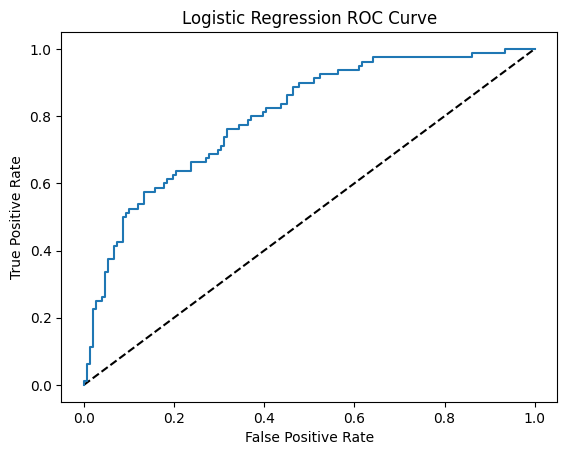

0.8002483443708608


In [32]:
#отрисовка ROC кривой
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs)) #площадь под кривой

Регрессия

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [33]:
diabetes_df = pd.read_csv('/content/diabetes_clean.csv')
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape) #(752, ) (752,)
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape) #для Х надо (752, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test) #R2 score
mean_squared_error(y_test, y_pred, squared=False) #RMSE

(768,) (768,)
(768, 1)


26.341459582232265

In [20]:
#cross-validation
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


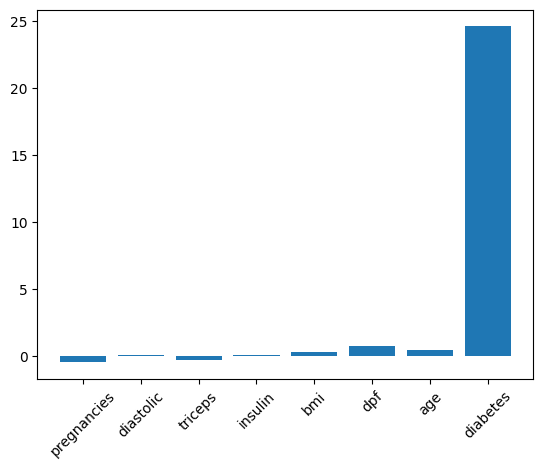

In [21]:
from sklearn.linear_model import Lasso,  Ridge
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show() #график - значение коэффициента и название

In [39]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10), "solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf) #RandomizedSearchCV(n_iter = 2) кол-во пар
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

test_score = ridge_cv.score(X_test, y_test) #0.7564
print(test_score)

{'alpha': 0.0001, 'solver': 'lsqr'} 0.3351541736379944
0.28567242428553274


In [54]:
#пример
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
music_dummies = pd.read_csv('/content/music_clean.csv')
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
print(np.sqrt(-linreg_cv))

[10.19270166 10.43734567  9.25570311  9.20541221  9.85376468]


In [58]:
#get_dummies
import pandas as pd
music_df = pd.read_csv('music_clean.csv')
music_dummies = pd.get_dummies(music_df["genre"], drop_first=True)
print(music_dummies.head())
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop("genre", axis=1)
# или сразу
music_dummies = pd.get_dummies(music_df, drop_first=True)
print(music_dummies.columns)

   1
0  1
1  1
2  1
3  1
4  1
Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'],
      dtype='object')


Работа с пропущенными значениями

In [60]:
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
print(music_df.isna().sum().sort_values())

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In [62]:
#imputation (помни о разделении выборки)
from sklearn.impute import SimpleImputer
X_cat = music_df["genre"].values.reshape(-1, 1)
X_num = music_df.drop(["genre","popularity"], axis=1).values
y = music_df["popularity"].values
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=12)
imp_cat = SimpleImputer(strategy="most_frequent")
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)
X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)

In [65]:
#Imputing within a pipeline
from sklearn.pipeline import Pipeline
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

steps = [("imputation", SimpleImputer()), ("logistic_regression", LogisticRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

Центрирование и масштабирование

In [66]:
print(music_df[["duration_ms", "loudness", "speechiness"]].describe())
from sklearn.preprocessing import StandardScaler
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

#scaling in pipeline
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=6))]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))

#CV и scaling в pipeline
from sklearn.model_selection import GridSearchCV
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print(cv.best_score_)
print(cv.best_params_)

        duration_ms     loudness  speechiness
count  1.000000e+03  1000.000000  1000.000000
mean   2.172204e+05    -8.253305     0.077879
std    1.175582e+05     5.158523     0.089451
min   -1.000000e+00   -38.718000     0.023400
25%    1.806562e+05    -9.775500     0.033100
50%    2.163000e+05    -6.855000     0.043600
75%    2.605025e+05    -4.977750     0.074950
max    1.617333e+06    -0.883000     0.710000
20666.582585618085 68890.98734103922
3.5971225997855074e-16 0.9999999999999996
1.0
1.0
{'knn__n_neighbors': 1}


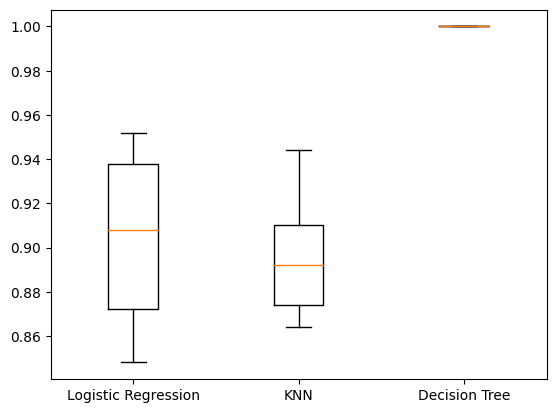

Logistic Regression Test Set Accuracy: 0.96
KNN Test Set Accuracy: 0.924
Decision Tree Test Set Accuracy: 0.996


In [74]:
#Evaluating classification models
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
music = pd.read_csv('music_clean.csv')
X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, shuffle=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys()) #список списков
plt.show()

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))